### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# globalnie: tłumi wszystkie warningi (używaj ostrożnie)
warnings.filterwarnings("ignore")



Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Ładowanie danych
data = load_breast_cancer()
X = data.data
y = data.target

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja i trenowanie modelu
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

In [5]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [4]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
# Obliczanie macierzy błędów
cm = confusion_matrix(y_test, y_pred)
print("Macierz błędów:")
print(cm)

Macierz błędów:
[[ 61   2]
 [  2 106]]


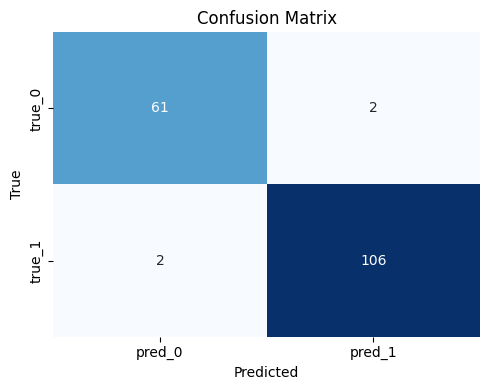

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['pred_0','pred_1'], yticklabels=['true_0','true_1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Metryki używane do oceny modeli klasyfikacyjnych

## Metryki - Klasyfikacja binarna

### Macierz błędów (Confusion Matrix)

Macierz błędów to tabela, która przedstawia wyniki przewidywań modelu w porównaniu do rzeczywistych klas. W przypadku klasyfikacji binarnej macierz ma postać 2x2 i zawiera cztery główne komponenty:

- **True Positives (TP)**: Liczba poprawnie sklasyfikowanych pozytywnych przypadków.
- **True Negatives (TN)**: Liczba poprawnie sklasyfikowanych negatywnych przypadków.
- **False Positives (FP)**: Liczba negatywnych przypadków, które zostały błędnie sklasyfikowane jako pozytywne.
- **False Negatives (FN)**: Liczba pozytywnych przypadków, które zostały błędnie sklasyfikowane jako negatywne.

![Macierz_pomylek](mp.png)

### Dokładność (Accuracy)

Dokładność to jedna z najprostszych miar oceny wydajności modelu. Oblicza się ją jako stosunek liczby poprawnych przewidywań do całkowitej liczby próbek:

####   $$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Dokładność jest przydatna w przypadku zrównoważonych zbiorów danych, ale może być myląca w przypadku niezrównoważonych klas, gdzie jedna klasa dominuje.


### Precyzja (Precision)

Precyzja mierzy dokładność pozytywnych przewidywań modelu. Jest to stosunek liczby prawdziwie pozytywnych do wszystkich przewidywanych pozytywnych:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Wysoka precyzja oznacza, że model rzadko klasyfikuje negatywne przypadki jako pozytywne.

### Czułość (Recall)

Czułość, znana również jako współczynnik prawdziwie pozytywny (True Positive Rate), ocenia, ile rzeczywistych pozytywnych przypadków zostało poprawnie wykrytych przez model:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Wysoka czułość oznacza, że model skutecznie identyfikuje pozytywne przypadki, minimalizując błędy typu II (False Negatives).

### Wskaźnik F1 (F1 Score)

Wskaźnik F1 to średnia harmoniczna precyzji i czułości, która łączy obie metryki w jedną wartość. Jest szczególnie przydatny w sytuacjach, gdy istnieje potrzeba zrównoważenia między precyzją a czułością:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Wskaźnik F1 jest użyteczny, gdy klasy są niezrównoważone i ważne jest, aby zarówno precyzja, jak i czułość były na wysokim poziomie.

### Raport klasyfikacji

## Krzywa ROC i AUC

Krzywa ROC (Receiver Operating Characteristic) to wykres, który przedstawia zależność między czułością (True Positive Rate) a współczynnikiem fałszywie pozytywnym (False Positive Rate) dla różnych progów decyzyjnych modelu.

AUC (Area Under the Curve) to pole pod krzywą ROC, które mierzy zdolność modelu do rozróżniania klas. AUC przyjmuje wartości od 0 do 1:

- AUC = 1 oznacza idealny model, który doskonale rozróżnia klasy.
- AUC = 0,5 oznacza model losowy, który nie ma zdolności do klasyfikacji.
- AUC < 0,5 oznacza model gorzej niż losowy.

Przykład interpretacji: Model ma AUC równe 0,85, co oznacza, że model ma dobrą zdolność do rozróżniania klas. Innymi słowy, prawdopodobieństwo, że model przypisze wyższą wartość prawdopodobieństwa do pozytywnej obserwacji niż do negatywnej, wynosi 0,85.

## Metryki - Klasyfikacja wieloklasowa